In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/Colab\ Notebooks/MIDAS

/content/drive/My Drive/Colab Notebooks/MIDAS


In [0]:
!ls

 calcs.docx					       MIDAS.ipynb
'Copy of Copy of Model (1).ipynb'		       Model.ipynb
'Copy of Copy of Model (2).ipynb'		       new_df.csv
'Copy of Copy of Model.ipynb'			       Notes.gdoc
 Draft.gdoc					       poster.pptx
 fields.xlsx					       project_profit.csv
'MIDAS Data Challenge 2019_WalterPMoore_Prompt.docx'   Report.gdoc
 MidasExport.csv				       XGboost.ipynb


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import csv
import time
import sys

In [0]:
# temp = pd.read_csv("MidasExport.csv", encoding = "ISO-8859-1")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# temp.isnull().sum()[temp.isnull().sum() != 0]

ClientCode             6
ClientPostalCode    1861
ProjectEngineer       21
dtype: int64

In [0]:
# df = pd.read_csv("MidasExport.csv", encoding = "ISO-8859-1")
df = pd.read_csv("new_df.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.shape

(351259, 86)

In [0]:
df.head()

,AccountingPeriod,PeriodEndDate,ProjectCode,ProjectFamily,BillingMTD,BillingPTD,ClientCity,ClientCode,ClientCountry,ClientPostalCode,ClientState,ClientTypeCode,ClientTypeName,CostMTD,CostPTD,DivisionHead,EffortAmtPED,EffortMTD,EffortPTD,EmpCountPED,FeeType,HoursPTD,IndiaCountPED,IndiaHrsPED,LaborRevenueMTD,LaborRevenuePTD,NonIndiaHrsPED,OverheadMTD,OverheadPTD,OwningOrgCode,OwningOrgName,ParentClientCode,ParentClientTypeCode,ParentClientTypeName,Principal,ProjectEngineer,ProjectManager,TotalBudgetCost,TotalBudgetEffort,TotalBudgetHours,...,DrafterUniqueCount,DraftingPctPED,EngAvgExp,EngCombinedExp,EngHoursPED,EngPctPED,EngProjectCountPED,EngUniqueCount,OtherAvgExp,OtherCombinedExp,OtherHoursPED,OtherPctPED,OtherUniqueCount,PMProjectCountPED,PrincipalProjectCountPED,FamilyProjectCount,FamilyEffortPTD,FamilyCostPTD,FamilyOverheadPTD,FamilyHoursPTD,FamilyRevenuePTD,FamilyBudgetEffort,FamilyEffortMTD,FamilyCostMTD,FamilyOverheadMTD,FamilyRevenueMTD,FamilyHoursPED,FamilyEffortPED,FamilyIndiaCountPED,FamilyIndiaHrsPED,LaborEffortPED,LaborCostPED,LaborHrsPED,RevenueMTD,LaborCostMTD,LaborOverheadMTD,RevenuePTD,LaborCostPTD,LaborOverheadPTD,TotalLaborBudgetEffort
0,200401,2004-01-25 00:00:00,120400100,1204001,0.0,0.0,Houston,UPTOWN,United States,77056,Texas,DE,Developer,0.00,0.00,121012,0.00,0.00,0.00,0,LS,0.0,0,0.0,0.00,0.00,0.0,0.0,0.0,Z91,Marketing,UPTOWN,DE,Developer,121012,121014.0,121014,0.0,2548.52,0.0,...,0,0.0,0.0,0.0,0.0,0.0,1,0,0.000000,0.000000,0.0,0.0,0,1,0,1,0.00,0.00,0.0,0.0,0.00,2548.52,0.00,0.00,0.0,0.00,0.0,0.00,0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,2548.52
1,200403,2004-02-29 00:00:00,120400100,1204001,1375.5,1895.4,Houston,UPTOWN,United States,77056,Texas,DE,Developer,491.27,676.92,121012,429.86,1375.55,1895.37,2,LS,23.5,0,0.0,1375.55,1895.37,5.0,0.0,0.0,Z91,Marketing,UPTOWN,DE,Developer,121012,121014.0,121014,0.0,2548.52,0.0,...,0,0.0,0.0,0.0,0.0,0.0,1,0,0.665753,0.665753,5.0,1.0,1,1,0,1,1895.37,676.92,0.0,23.5,1895.37,2548.52,1375.55,491.27,0.0,1375.55,5.0,429.86,0,0.0,429.86,153.52,5.0,1375.55,491.27,0.0,1895.37,676.92,0.0,2548.52
2,200403,2004-03-14 00:00:00,120400100,1204001,1375.5,1895.4,Houston,UPTOWN,United States,77056,Texas,DE,Developer,491.27,676.92,121012,85.96,1375.55,1895.37,1,LS,23.5,0,0.0,1375.55,1895.37,1.0,0.0,0.0,Z91,Marketing,UPTOWN,DE,Developer,121012,121014.0,121014,0.0,2548.52,0.0,...,0,0.0,0.0,0.0,0.0,0.0,1,0,0.704109,0.704109,1.0,1.0,1,1,0,1,1895.37,676.92,0.0,23.5,1895.37,2548.52,1375.55,491.27,0.0,1375.55,1.0,85.96,0,0.0,85.96,30.70,1.0,1375.55,491.27,0.0,1895.37,676.92,0.0,2548.52
3,200403,2004-03-21 00:00:00,120400100,1204001,1375.5,1895.4,Houston,UPTOWN,United States,77056,Texas,DE,Developer,491.27,676.92,121012,859.73,1375.55,1895.37,3,LS,23.5,0,0.0,1375.55,1895.37,11.0,0.0,0.0,Z91,Marketing,UPTOWN,DE,Developer,121012,121014.0,121014,0.0,2548.52,0.0,...,0,0.0,0.0,0.0,0.0,0.0,2,0,0.723287,0.723287,11.0,1.0,1,2,0,1,1895.37,676.92,0.0,23.5,1895.37,2548.52,1375.55,491.27,0.0,1375.55,11.0,859.73,0,0.0,859.73,307.05,11.0,1375.55,491.27,0.0,1895.37,676.92,0.0,2548.52
4,200404,2004-04-04 00:00:00,120400100,1204001,653.1,2548.5,Houston,UPTOWN,United States,77056,Texas,DE,Developer,233.27,910.19,121012,395.24,653.15,2548.52,3,LS,31.5,0,0.0,653.15,2548.52,5.0,0.0,0.0,Z91,Marketing,UPTOWN,DE,Developer,121012,121014.0,121014,0.0,2548.52,0.0,...,0,0.0,0.0,0.0,0.0,0.0,3,0,0.761643,0.761643,5.0,1.0,1,3,0,1,2548.52,910.19,0.0,31.5,2548.52,2548.52,653.15,233.27,0.0,653.15,5.0,395.24,0,0.0,395.24,141.16,5.0,653.15,233.27,0.0,2548.52,910.19,0.0,2548.52


In [0]:
df.describe()

,AccountingPeriod,BillingMTD,BillingPTD,CostMTD,CostPTD,DivisionHead,EffortAmtPED,EffortMTD,EffortPTD,EmpCountPED,HoursPTD,IndiaCountPED,IndiaHrsPED,LaborRevenueMTD,LaborRevenuePTD,NonIndiaHrsPED,OverheadMTD,OverheadPTD,Principal,ProjectEngineer,ProjectManager,TotalBudgetCost,TotalBudgetEffort,TotalBudgetHours,TotalHoursPED,DrafterAvgExp,DrafterCombinedExp,DrafterHoursPED,DrafterUniqueCount,DraftingPctPED,EngAvgExp,EngCombinedExp,EngHoursPED,EngPctPED,EngProjectCountPED,EngUniqueCount,OtherAvgExp,OtherCombinedExp,OtherHoursPED,OtherPctPED,OtherUniqueCount,PMProjectCountPED,PrincipalProjectCountPED,FamilyProjectCount,FamilyEffortPTD,FamilyCostPTD,FamilyOverheadPTD,FamilyHoursPTD,FamilyRevenuePTD,FamilyBudgetEffort,FamilyEffortMTD,FamilyCostMTD,FamilyOverheadMTD,FamilyRevenueMTD,FamilyHoursPED,FamilyEffortPED,FamilyIndiaCountPED,FamilyIndiaHrsPED,LaborEffortPED,LaborCostPED,LaborHrsPED,RevenueMTD,LaborCostMTD,LaborOverheadMTD,RevenuePTD,LaborCostPTD,LaborOverheadPTD,TotalLaborBudgetEffort
count,351259.000000,3.512590e+05,3.512590e+05,351259.000000,3.512590e+05,351259.000000,351259.000000,351259.000000,3.512590e+05,351259.00000,351259.000000,351259.000000,351259.000000,351259.000000,3.512590e+05,351259.000000,351259.000000,3.512590e+05,351259.000000,351238.000000,351259.000000,351259.000000,3.512590e+05,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,3.512590e+05,3.512590e+05,3.512590e+05,351259.000000,3.512590e+05,3.512590e+05,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,3.512590e+05,3.512590e+05,3.512590e+05,3.512590e+05
mean,200997.857182,6.393168e+03,1.188424e+05,2297.652261,4.016355e+04,303521.462784,1421.289823,5653.575320,9.715778e+04,5.13393,980.868647,0.038111,0.176463,5814.951252,9.848561e+04,13.760409,3476.681671,5.796373e+04,333810.723312,345422.947622,342768.156164,103.829261,1.490574e+05,1175.403687,13.936872,1.755376,2.394398,2.820487,0.340404,0.100603,5.977705,10.799190,10.615706,0.646353,5.247336,1.430953,0.256518,0.277851,0.284580,0.022218,0.044446,5.996384,6.757088,1.710026,1.783879e+05,7.093506e+04,1.059173e+05,1817.001231,1.816069e+05,2.616047e+05,9130.217936,3612.269611,5555.965885,9460.521399,22.539953,2346.608374,0.053977,0.249435,1256.680159,415.892078,13.936872,6393.889497,1665.468148,3476.681671,1.095952e+05,2.825067e+04,5.796373e+04,1.490574e+05
std,485.342695,2.255739e+04,3.860940e+05,8248.625350,1.606348e+05,101435.620378,4685.105726,15709.253108,3.399258e+05,14.82283,3275.741740,0.497964,2.583081,15777.332943,3.172182e+05,38.283681,8607.667820,1.834671e+05,79774.981256,101397.119761,92625.492715,2764.704563,4.128554e+05,3200.026954,38.637276,4.578663,6.678608,11.267740,0.784075,0.263224,6.851289,14.743084,29.680286,0.451085,3.776752,1.561327,1.968779,2.118660,2.287813,0.131718,0.226813,3.888560,5.266138,2.065044,5.991369e+05,2.454019e+05,3.358217e+05,6077.889207,5.912425e+05,7.526149e+05,23927.239458,11144.538676,13657.475410,24428.617328,58.483094,7081.485305,0.648501,3.337617,3366.979842,1080.090255,38.637276,18274.612229,4299.076442,8607.667820,3.717629e+05,9.175622e+04,1.834671e+05,4.128554e+05
min,200012.000000,-1.218300e+06,-4.615800e+02,-48545.950000,-8.460300e+03,111021.000000,-250110.500000,-98358.510000,-2.538090e+04,0.00000,-343.500000,0.000000,-34.500000,-708413.170000,-7.459040e+03,-990.000000,-67185.025425,-1.872603e+04,111023.000000,39000.000000,111025.000000,0.000000,0.000000e+00,0.000000,-990.000000,-1.430136,-1.430136,-510.000000,0.000000,-62.000000,-2.841095,-2.841095,-930.000000,-11.333333,0.000000,0.000000,0.000000,0.000000,-82.000000,-5.090909,0.000000,0.000000,0.000000,1.000000,-2.538090

In [0]:
df.ProjectCode = df.ProjectCode.astype(str)
df.ProjectFamily = df.ProjectFamily.astype(str)

#Note that original project code is a mixture of int and string, convert them to str.

In [0]:
# #First, get rid of the cost-plus project and corporate overhead work
# df = df.loc[(df.FeeType == "LS") & (df.ProjectCode.apply(lambda x:x[:2] != '15')),:]

In [0]:
# df.to_csv('new_df.csv',index = False)

In [0]:
df.describe()

,AccountingPeriod,BillingMTD,BillingPTD,CostMTD,CostPTD,DivisionHead,EffortAmtPED,EffortMTD,EffortPTD,EmpCountPED,HoursPTD,IndiaCountPED,IndiaHrsPED,LaborRevenueMTD,LaborRevenuePTD,NonIndiaHrsPED,OverheadMTD,OverheadPTD,Principal,ProjectEngineer,ProjectManager,TotalBudgetCost,TotalBudgetEffort,TotalBudgetHours,TotalHoursPED,DrafterAvgExp,DrafterCombinedExp,DrafterHoursPED,DrafterUniqueCount,DraftingPctPED,EngAvgExp,EngCombinedExp,EngHoursPED,EngPctPED,EngProjectCountPED,EngUniqueCount,OtherAvgExp,OtherCombinedExp,OtherHoursPED,OtherPctPED,OtherUniqueCount,PMProjectCountPED,PrincipalProjectCountPED,FamilyProjectCount,FamilyEffortPTD,FamilyCostPTD,FamilyOverheadPTD,FamilyHoursPTD,FamilyRevenuePTD,FamilyBudgetEffort,FamilyEffortMTD,FamilyCostMTD,FamilyOverheadMTD,FamilyRevenueMTD,FamilyHoursPED,FamilyEffortPED,FamilyIndiaCountPED,FamilyIndiaHrsPED,LaborEffortPED,LaborCostPED,LaborHrsPED,RevenueMTD,LaborCostMTD,LaborOverheadMTD,RevenuePTD,LaborCostPTD,LaborOverheadPTD,TotalLaborBudgetEffort
count,351259.000000,3.512590e+05,3.512590e+05,351259.000000,3.512590e+05,351259.000000,351259.000000,351259.000000,3.512590e+05,351259.00000,351259.000000,351259.000000,351259.000000,351259.000000,3.512590e+05,351259.000000,351259.000000,3.512590e+05,351259.000000,351238.000000,351259.000000,351259.000000,3.512590e+05,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,3.512590e+05,3.512590e+05,3.512590e+05,351259.000000,3.512590e+05,3.512590e+05,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,351259.000000,3.512590e+05,3.512590e+05,3.512590e+05,3.512590e+05
mean,200997.857182,6.393168e+03,1.188424e+05,2297.652261,4.016355e+04,303521.462784,1421.289823,5653.575320,9.715778e+04,5.13393,980.868647,0.038111,0.176463,5814.951252,9.848561e+04,13.760409,3476.681671,5.796373e+04,333810.723312,345422.947622,342768.156164,103.829261,1.490574e+05,1175.403687,13.936872,1.755376,2.394398,2.820487,0.340404,0.100603,5.977705,10.799190,10.615706,0.646353,5.247336,1.430953,0.256518,0.277851,0.284580,0.022218,0.044446,5.996384,6.757088,1.710026,1.783879e+05,7.093506e+04,1.059173e+05,1817.001231,1.816069e+05,2.616047e+05,9130.217936,3612.269611,5555.965885,9460.521399,22.539953,2346.608374,0.053977,0.249435,1256.680159,415.892078,13.936872,6393.889497,1665.468148,3476.681671,1.095952e+05,2.825067e+04,5.796373e+04,1.490574e+05
std,485.342695,2.255739e+04,3.860940e+05,8248.625350,1.606348e+05,101435.620378,4685.105726,15709.253108,3.399258e+05,14.82283,3275.741740,0.497964,2.583081,15777.332943,3.172182e+05,38.283681,8607.667820,1.834671e+05,79774.981256,101397.119761,92625.492715,2764.704563,4.128554e+05,3200.026954,38.637276,4.578663,6.678608,11.267740,0.784075,0.263224,6.851289,14.743084,29.680286,0.451085,3.776752,1.561327,1.968779,2.118660,2.287813,0.131718,0.226813,3.888560,5.266138,2.065044,5.991369e+05,2.454019e+05,3.358217e+05,6077.889207,5.912425e+05,7.526149e+05,23927.239458,11144.538676,13657.475410,24428.617328,58.483094,7081.485305,0.648501,3.337617,3366.979842,1080.090255,38.637276,18274.612229,4299.076442,8607.667820,3.717629e+05,9.175622e+04,1.834671e+05,4.128554e+05
min,200012.000000,-1.218300e+06,-4.615800e+02,-48545.950000,-8.460300e+03,111021.000000,-250110.500000,-98358.510000,-2.538090e+04,0.00000,-343.500000,0.000000,-34.500000,-708413.170000,-7.459040e+03,-990.000000,-67185.025425,-1.872603e+04,111023.000000,39000.000000,111025.000000,0.000000,0.000000e+00,0.000000,-990.000000,-1.430136,-1.430136,-510.000000,0.000000,-62.000000,-2.841095,-2.841095,-930.000000,-11.333333,0.000000,0.000000,0.000000,0.000000,-82.000000,-5.090909,0.000000,0.000000,0.000000,1.000000,-2.538090

In [0]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

df.isnull().sum()
#Only ProjectEngineer has 21 missing values and ClientPostalCode has 1710.

AccountingPeriod               0
PeriodEndDate                  0
ProjectCode                    0
ProjectFamily                  0
BillingMTD                     0
BillingPTD                     0
ClientCity                     0
ClientCode                     6
ClientCountry                  0
ClientPostalCode            1710
ClientState                    0
ClientTypeCode                 0
ClientTypeName                 0
CostMTD                        0
CostPTD                        0
DivisionHead                   0
EffortAmtPED                   0
EffortMTD                      0
EffortPTD                      0
EmpCountPED                    0
FeeType                        0
HoursPTD                       0
IndiaCountPED                  0
IndiaHrsPED                    0
LaborRevenueMTD                0
LaborRevenuePTD                0
NonIndiaHrsPED                 0
OverheadMTD                    0
OverheadPTD                    0
OwningOrgCode                  0
OwningOrgN

In [0]:
#For the .Project Engineer, we see that the values are the employee ID, so they will fill the missing value by an empty string.
#For the postal code, we get rid of the whole column since we have the city and state information which is enough.

In [0]:
df['ProjectEngineer'] = df['ProjectEngineer'].fillna("")

In [0]:
sorted(df.columns)

['AccountingPeriod',
 'BillingMTD',
 'BillingPTD',
 'ClientCity',
 'ClientCode',
 'ClientCountry',
 'ClientPostalCode',
 'ClientState',
 'ClientTypeCode',
 'ClientTypeName',
 'CostMTD',
 'CostPTD',
 'DivisionHead',
 'DrafterAvgExp',
 'DrafterCombinedExp',
 'DrafterHoursPED',
 'DrafterUniqueCount',
 'DraftingPctPED',
 'EffortAmtPED',
 'EffortMTD',
 'EffortPTD',
 'EmpCountPED',
 'EngAvgExp',
 'EngCombinedExp',
 'EngHoursPED',
 'EngPctPED',
 'EngProjectCountPED',
 'EngUniqueCount',
 'FamilyBudgetEffort',
 'FamilyCostMTD',
 'FamilyCostPTD',
 'FamilyEffortMTD',
 'FamilyEffortPED',
 'FamilyEffortPTD',
 'FamilyHoursPED',
 'FamilyHoursPTD',
 'FamilyIndiaCountPED',
 'FamilyIndiaHrsPED',
 'FamilyOverheadMTD',
 'FamilyOverheadPTD',
 'FamilyProjectCount',
 'FamilyRevenueMTD',
 'FamilyRevenuePTD',
 'FeeType',
 'HoursPTD',
 'IndiaCountPED',
 'IndiaHrsPED',
 'LaborCostMTD',
 'LaborCostPED',
 'LaborCostPTD',
 'LaborEffortPED',
 'LaborHrsPED',
 'LaborOverheadMTD',
 'LaborOverheadPTD',
 'LaborRevenueMTD

In [0]:
#Feature selection, remove monotone variables. Monotone Variables mean that the variables most values of this variable is the same. This will have little effect for the division tree.
del_cols = []
for label,content in df.iteritems():
  if content.value_counts(normalize = True).max() > 0.7:
    del_cols.append(label)
del_cols.append("ClientPostalCode")

In [0]:
del_cols

['ClientCountry',
 'FeeType',
 'IndiaCountPED',
 'IndiaHrsPED',
 'TotalBudgetCost',
 'DrafterAvgExp',
 'DrafterCombinedExp',
 'DrafterHoursPED',
 'DrafterUniqueCount',
 'DraftingPctPED',
 'OtherAvgExp',
 'OtherCombinedExp',
 'OtherHoursPED',
 'OtherPctPED',
 'OtherUniqueCount',
 'FamilyProjectCount',
 'FamilyIndiaCountPED',
 'FamilyIndiaHrsPED',
 'ClientPostalCode']

In [0]:
df = df.drop(del_cols,axis = 1)

In [0]:
#Calculate different metrics

In [0]:
sum(df['TotalLaborBudgetEffort'] == 0)

4677

In [0]:
sum(df['TotalBudgetEffort'] == 0)

4677

In [0]:
sum((df['TotalBudgetEffort'] == 0) & (df["LaborRevenueMTD"] == 0))

2205

In [0]:
sum((df['TotalLaborBudgetEffort'] == 0) & (df["LaborRevenueMTD"] == 0))

2205

In [0]:
#% complete labor
df['per_com_laborMTD'] = df["LaborRevenueMTD"]/df['TotalLaborBudgetEffort']
df['per_com_laborPTD'] = df["LaborRevenuePTD"]/df['TotalLaborBudgetEffort']

In [0]:
#% used labor
df["per_used_laborMTD"] = df["LaborRevenueMTD"]/df["TotalBudgetEffort"]
df['per_used_laborPTD'] = df["LaborRevenuePTD"]/df['TotalBudgetEffort']

In [0]:
#overhead rate
df['overhead_rate'] = df['LaborOverheadMTD']/df['LaborCostMTD']

In [0]:
df.isnull().sum()

AccountingPeriod                0
PeriodEndDate                   0
ProjectCode                     0
ProjectFamily                   0
BillingMTD                      0
BillingPTD                      0
ClientCity                      0
ClientCode                      6
ClientState                     0
ClientTypeCode                  0
ClientTypeName                  0
CostMTD                         0
CostPTD                         0
DivisionHead                    0
EffortAmtPED                    0
EffortMTD                       0
EffortPTD                       0
EmpCountPED                     0
HoursPTD                        0
LaborRevenueMTD                 0
LaborRevenuePTD                 0
NonIndiaHrsPED                  0
OverheadMTD                     0
OverheadPTD                     0
OwningOrgCode                   0
OwningOrgName                   0
ParentClientCode                0
ParentClientTypeCode            0
ParentClientTypeName            0
Principal     

In [0]:
df = df.replace([np.inf, -np.inf], sys.maxsize)

In [0]:
df = df.fillna(sys.maxsize)

In [0]:
# df = df.dropna()
#There will be 4667 inf/-inf -> maxsize row for per_used_labor and oer_com_labor. This is caused when 'TotalLaborBudgetEffort' = 0. However, that does not mean the LaborRevenue is 0, so we still need to
#keep it in the data. We will represent it aas the max int/ min int to distinguish it from other possible values it can have, and simply to let dicision tree know that those max int are from same kind.
#For the NAs, it means both values are zero. In that case, we disregard them.

Text(0.5, 1.0, 'Number of Sub-Projects in Project Family')

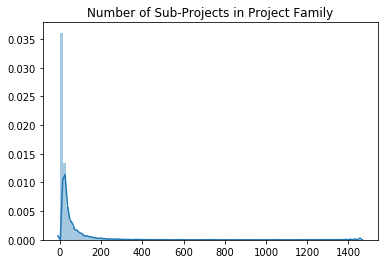

In [0]:
temp = df.groupby('ProjectFamily')['ProjectFamily'].count()
%matplotlib inline
sns.distplot(a = temp.values,bins = 100)
plt.title("Number of Sub-Projects in Project Family")

In [0]:
# df.groupby('ProjectFamily')['FamilyRevenueMTD'].max()
# pd.DataFrame(pd.DataFrame(df.groupby(['ProjectFamily','AccountingPeriod'])['profit_amtMTD'].first()).groupby('ProjectFamily')['profit_amtMTD'].sum())

In [0]:
# tot_revenue = pd.DataFrame(pd.DataFrame(df.groupby(['ProjectFamily','AccountingPeriod'])['FamilyRevenueMTD'].first()).groupby('ProjectFamily')['FamilyRevenueMTD'].sum()).reset_index()
# tot_revenue = tot_revenue.rename(columns = {'FamilyRevenueMTD':'Total_Revenue'})

In [0]:
# tot_cost = pd.DataFrame(pd.DataFrame(df.groupby(['ProjectFamily','AccountingPeriod'])['FamilyCostMTD'].first()).groupby('ProjectFamily')['FamilyCostMTD'].sum()).reset_index()
# tot_cost = tot_cost.rename(columns = {'FamilyCostMTD':'Total_Cost'})

In [0]:
# tot_overhead = pd.DataFrame(pd.DataFrame(df.groupby(['ProjectFamily','AccountingPeriod'])['FamilyOverheadMTD'].first()).groupby('ProjectFamily')['FamilyOverheadMTD'].sum()).reset_index()
# tot_overhead = tot_overhead.rename(columns = {'FamilyOverheadMTD':'Total_Overhead'})

In [0]:
# proj_prof =pd.merge(tot_overhead,tot_revenue,on = 'ProjectFamily').merge(tot_cost,on = 'ProjectFamily')

In [0]:
# proj_prof["profit_amt"] = proj_prof['Total_Revenue'] - (proj_prof["Total_Overhead"] + proj_prof['Total_Cost'])
# proj_prof["profit_per"] = (proj_prof['Total_Revenue'] - (proj_prof["Total_Overhead"] + proj_prof['Total_Cost']))/proj_prof['Total_Revenue']


In [0]:
mtd_cols = ['FamilyRevenueMTD','FamilyCostMTD','FamilyOverheadMTD','BillingMTD','CostMTD','EffortMTD','LaborOverheadMTD','OverheadMTD','LaborCostMTD','LaborRevenueMTD','TotalBudgetEffort']#monthly

In [0]:
ped_cols = ['EffortAmtPED','EmpCountPED','EngHoursPED','EngProjectCountPED','EngUniqueCount','LaborHrsPED','PMProjectCountPED','PrincipalProjectCountPED','TotalHoursPED',\
            'LaborEffortPED','NonIndiaHrsPED','EngCombinedExp']
#period data, this is the minimum unit. Add them together we will get the total value for the subproject.

In [0]:
#There are some variables which only have PTD
ptd_cols = ['TotalBudgetHours','HoursPTD','TotalLaborBudgetEffort']

In [0]:
#varchar avaraibles. For each project family, this variable will be unique.
var_cols = ['ClientCity','ClientCode','ClientState','ClientTypeCode','DivisionHead','OwningOrgCode','ParentClientCode','ParentClientTypeCode','Principal','ProjectEngineer',\
            'ProjectManager','TypeCode']

In [0]:
#We only need the percentage data, there is one additional step to put them together, which is to take the average of them over the number of periods
#EngAvgExp,EngPctPED

In [0]:
df[['ProjectCode','ProjectFamily','TotalBudgetEffort']].head(100)

In [0]:
def proj_df(df):
  proj_prof = pd.DataFrame({'ProjectFamily':sorted(df['ProjectFamily'].unique())})
  for col in mtd_cols:
    tmp = pd.DataFrame(pd.DataFrame(df.groupby(['ProjectFamily','AccountingPeriod'])[col].first()).groupby('ProjectFamily')[col].sum()).reset_index()
    proj_prof = pd.merge(tmp,proj_prof,on = 'ProjectFamily')
  for col in ptd_cols:
    tmp = pd.DataFrame(df.groupby('ProjectFamily')[col].first()).reset_index()
    proj_prof = pd.merge(tmp,proj_prof,on = 'ProjectFamily')
  for col in var_cols:
    tmp = pd.DataFrame(df.groupby('ProjectFamily')[col].first()).reset_index()
    proj_prof = pd.merge(tmp,proj_prof,on = 'ProjectFamily')
  for col in ped_cols:
    tmp = pd.DataFrame(df.groupby(['ProjectFamily'])[col].sum()).reset_index()
    proj_prof = pd.merge(tmp,proj_prof,on = 'ProjectFamily')
  proj_prof['per_com_laborMTD'] = proj_prof["LaborRevenueMTD"]/df['TotalLaborBudgetEffort']
  proj_prof["per_used_laborMTD"] = proj_prof["LaborRevenueMTD"]/proj_prof["TotalBudgetEffort"]
  proj_prof["profit_amt"] = proj_prof['FamilyRevenueMTD'] - (proj_prof["FamilyOverheadMTD"] + proj_prof['FamilyCostMTD'])
  proj_prof["profit_per"] = (proj_prof['FamilyRevenueMTD'] - (proj_prof["FamilyOverheadMTD"] + proj_prof['FamilyCostMTD']))/proj_prof['FamilyRevenueMTD']
  proj_prof['profit'] = proj_prof['profit_amt']
  proj_prof['profit'] = proj_prof['profit'].apply(lambda x: 1 if x > 0 else 0)
  proj_prof = proj_prof.rename(columns={"profit_amt":"total profit"})
  #WIP
  proj_prof["wip"] = proj_prof["FamilyRevenueMTD"] - proj_prof["BillingMTD"]
  proj_prof = proj_prof.replace(np.inf, sys.maxsize)
  proj_prof = proj_prof.replace(-np.inf,-sys.maxsize - 1)
  proj_prof = proj_prof.drop(columns=["FamilyOverheadMTD",	"FamilyCostMTD",	"FamilyRevenueMTD",	"profit_per","OverheadMTD","CostMTD"])
  #Similar to what we did to the percentage of labor. Only when both sides are 0 will we drop it. If infinity we encode it as max int or min it.
  #Convert all varchar to lowercase
  for i in range(len(proj_prof['ClientCode'])):
    try:
      proj_prof['ClientCode'][i] = proj_prof['ClientCode'][i].lower()
    except:
      print(i,'\n')
  for i in proj_prof.columns:
    if(proj_prof.loc[:,i]).dtypes == 'O':
      try:
        proj_prof.loc[:,i] = proj_prof.loc[:,i].apply(lambda x:x.lower())
      except:
        print(i)
  return proj_prof

In [0]:
proj_prof = proj_df(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


5039 

ProjectEngineer
ClientCode


,ProjectFamily,EngCombinedExp,NonIndiaHrsPED,LaborEffortPED,TotalHoursPED,PrincipalProjectCountPED,PMProjectCountPED,LaborHrsPED,EngUniqueCount,EngProjectCountPED,EngHoursPED,EmpCountPED,EffortAmtPED,TypeCode,ProjectManager,ProjectEngineer,Principal,ParentClientTypeCode,ParentClientCode,OwningOrgCode,DivisionHead,ClientTypeCode,ClientState,ClientCode,ClientCity,TotalLaborBudgetEffort,HoursPTD,TotalBudgetHours,TotalBudgetEffort,LaborRevenueMTD,LaborCostMTD,LaborOverheadMTD,EffortMTD,BillingMTD,per_com_laborMTD,per_used_laborMTD,profit,wip
0,1204001,0.000000,31.50,2548.52,31.50,0,11,31.50,0,11,0.00,16,2603.65,p06,121014,121014,121012,de,uptown,z91,121012,de,texas,uptown,houston,2548.52,0.0,0.0,25485.2,2548.52,910.19,0.000000,2603.65,2603.63,1.000000,0.100000,1,-55.11
1,2300002,300.358875,770.75,45814.18,770.75,1196,382,770.75,91,653,582.25,381,48369.01,p06,230173,230173,230173,de,louett,t03,230009,de,texas,louett,houston,5000.00,0.0,55.0,937500.0,40510.90,9766.85,19748.315675,29553.13,56857.39,15.895853,0.043212,1,17753.47
2,2300028,21.189041,9.00,607.49,9.00,141,71,9.00,1,71,3.00,5,607.49,e02,230018,230018,230021,ar,kenn,c03,230009,ar,missouri,kenn,st. louis,6000.00,0.0,86.0,42000.0,6000.00,216.96,433.703040,607.49,6000.00,2.354308,0.142857,1,0.00
3,2300033,53.361638,19.00,1173.18,19.00,599,87,19.00,15,385,13.00,39,1427.79,p06,230195,230141,230021,ar,zca,c03,230009,ar,texas,zca,houston,0.00,0.0,0.0,209000.0,12681.96,458.40,930.186018,1386.12,235.45,4.976206,0.060679,1,18634.99
4,2300036,43.479450,11.50,907.59,11.50,269,41,11.50,6,112,11.50,14,933.65,c06,230125,230018,230021,ar,j*r,c03,230009,ar,texas,j*r,houston,4800.00,2.5,70.0,48000.0,1200.00,302.53,573.544123,933.65,1211.30,0.470862,0.025000,1,-11.30


In [0]:
# for col in ptd_cols:
#   tmp = pd.DataFrame(df.groupby('ProjectFamily')[col].first()).reset_index()
#   proj_prof = pd.merge(tmp,proj_prof,on = 'ProjectFamily')

In [0]:
# for col in var_cols:
#   tmp = pd.DataFrame(df.groupby('ProjectFamily')[col].first()).reset_index()
#   proj_prof = pd.merge(tmp,proj_prof,on = 'ProjectFamily')

In [0]:
# for col in ped_cols:
#   tmp = pd.DataFrame(df.groupby(['ProjectFamily'])[col].sum()).reset_index()
#   proj_prof = pd.merge(tmp,proj_prof,on = 'ProjectFamily')

In [0]:
# proj_prof['per_com_laborMTD'] = proj_prof["LaborRevenueMTD"]/df['TotalLaborBudgetEffort']
# proj_prof["per_used_laborMTD"] = proj_prof["LaborRevenueMTD"]/proj_prof["TotalBudgetEffort"]

In [0]:
# proj_prof["profit_amt"] = proj_prof['FamilyRevenueMTD'] - (proj_prof["FamilyOverheadMTD"] + proj_prof['FamilyCostMTD'])
# proj_prof["profit_per"] = (proj_prof['FamilyRevenueMTD'] - (proj_prof["FamilyOverheadMTD"] + proj_prof['FamilyCostMTD']))/proj_prof['FamilyRevenueMTD']

In [0]:
# proj_prof['profit'] = proj_prof['profit_amt']
# proj_prof['profit'] = proj_prof['profit'].apply(lambda x: 1 if x > 0 else 0)
# proj_prof = proj_prof.rename(columns={"profit_amt":"total profit"})

In [0]:
# #WIP
# proj_prof["wip"] = proj_prof["FamilyRevenueMTD"] - proj_prof["BillingMTD"]

In [0]:
# proj_prof = proj_prof.replace(np.inf, sys.maxsize)
# proj_prof = proj_prof.replace(-np.inf,-sys.maxsize - 1)
# #Similar to what we did to the percentage of labor. Only when both sides are 0 will we drop it. If infinity we encode it as max int or min it.

In [0]:
proj_prof.isnull().sum()

In [0]:
proj_prof.head(10)

,ProjectFamily,EngCombinedExp,NonIndiaHrsPED,LaborEffortPED,TotalHoursPED,PrincipalProjectCountPED,PMProjectCountPED,LaborHrsPED,EngUniqueCount,EngProjectCountPED,EngHoursPED,EmpCountPED,EffortAmtPED,TypeCode,ProjectManager,ProjectEngineer,Principal,ParentClientTypeCode,ParentClientCode,OwningOrgCode,DivisionHead,ClientTypeCode,ClientState,ClientCode,ClientCity,TotalLaborBudgetEffort,HoursPTD,TotalBudgetHours,TotalBudgetEffort,LaborRevenueMTD,LaborCostMTD,OverheadMTD,LaborOverheadMTD,EffortMTD,CostMTD,BillingMTD,FamilyOverheadMTD,FamilyCostMTD,FamilyRevenueMTD,per_com_laborMTD,per_used_laborMTD,total profit,profit_per,profit,wip
0,1204001,0.000000,31.50,2548.52,31.50,0,11,31.50,0,11,0.00,16,2603.65,P06,121014,121014,121012,DE,UPTOWN,Z91,121012,DE,Texas,UPTOWN,Houston,2548.52,0.0,0.0,25485.20,2548.52,910.19,0.000000,0.000000,2603.65,960.31,2603.63,0.000000,960.31,2548.52,1.000000,0.100000,1588.210000,0.623189,1,-5.511000e+01
1,2300002,300.358875,770.75,45814.18,770.75,1196,382,770.75,91,653,582.25,381,48369.01,P06,230173,230173,230173,DE,LOUETT,T03,230009,DE,Texas,LOUETT,HOUSTON,5000.00,0.0,55.0,937500.00,40510.90,9766.85,19748.315675,19748.315675,29553.13,11611.41,56857.39,40641.283837,23287.80,74610.86,15.895853,0.043212,10681.776163,0.143167,1,1.775347e+04
2,2300028,21.189041,9.00,607.49,9.00,141,71,9.00,1,71,3.00,5,607.49,E02,230018,230018,230021,AR,KENN,C03,230009,AR,Missouri,KENN,ST. LOUIS,6000.00,0.0,86.0,42000.00,6000.00,216.96,433.703040,433.703040,607.49,216.96,6000.00,433.703040,216.96,6000.00,2.354308,0.142857,5349.336960,0.891556,1,0.000000e+00
3,2300033,53.361638,19.00,1173.18,19.00,599,87,19.00,15,385,13.00,39,1427.79,P06,230195,230141,230021,AR,ZCA,C03,230009,AR,Texas,ZCA,Houston,0.00,0.0,0.0,209000.00,12681.96,458.40,930.186018,930.186018,1386.12,557.70,235.45,5348.315848,2944.55,18870.44,4.976206,0.060679,10577.574152,0.560537,1,1.863499e+04
4,2300036,43.479450,11.50,907.59,11.50,269,41,11.50,6,112,11.50,14,933.65,C06,230125,230018,230021,AR,J*R,C03,230009,AR,Texas,J*R,HOUSTON,4800.00,2.5,70.0,48000.00,1200.00,302.53,573.544123,573.544123,933.65,328.59,1211.30,573.544123,328.59,1200.00,0.470862,0.025000,297.865877,0.248222,1,-1.130000e+01
5,2300043,349.347908,1133.50,76634.88,1133.50,1586,749,1133.50,103,1469,492.00,645,90017.47,P06,230172,230021,230021,AR,J*R,C03,230009,AR,Texas,J*R,HOUSTON,55383.46,0.0,716.0,1909854.18,64288.46,36865.96,73474.864626,73474.864626,116713.39,48044.30,74545.73,75324.564790,52861.04,68398.46,25.225802,0.033661,-59787.144790,-0.874101,0,-6.147270e+03
6,2300050,423.189013,443.50,28424.19,443.50,1021,1021,443.50,70,411,390.00,253,29481.33,P06,230021,230175,230021,DE,CDC,C03,230009,DE,Texas,CDC,Houston,42621.19,0.0,500.0,1065529.75,42621.19,12765.95,25471.413577,25471.413577,41175.21,13788.28,43322.38,28287.633383,15172.81,48031.96,16.723899,0.040000,4571.516617,0.095177,1,4.709580e+03
7,2300055,0.000000,1.50,73.50,1.50,0,65,1.50,0,65,0.00,5,75.94,H07,230160,230160,230146,GO,H*C,O04,230009,GO,Texas,HCID1,Houston,9500.00,0.0,130.0,85500.00,9500.00,3202.59,6401.977410,6401.977410,9072.62,3307.95,9500.00,57972.087427,170457.94,90386.51,3.727654,0.111111,-138043.517427,-1.527258,0,8.088651e+04
8,2300059,24.210956,77.50,4614.50,77.50,332,29,77.50,6,199,16.50,90,4649.16,P06,230195,230141,230021,AR,J*R,C03,230009,AR,Texas,J*R,HOUSTON,6031.90,0.0,85.0,78414.70,6031.90,3508.74,7025.826999,7025.826999,10592.89,3567.73,6031.90,7025.826999,3567.73,6031.90,2.366825,0.076923,-4561.656999,-0.756255,0,-9.094947e-13
9,2300064,0.000000,0.00,0.00,0.00,182,86,0.00,0,86,0.00,0,0.00,E02,230173,230173,230021,AR,HEERY,T03,230009,AR,Florida,HEERY,Tampa,2000.00,0.0,30.0,18000.00,2000.00,361.42,722.478580,722.478580,1030.13,377.92,2000.00,722.478580,377.92,2000.00,0.784769,0.111111,899.601420,0.449801,1,0.000000e+00


11.167311906814575


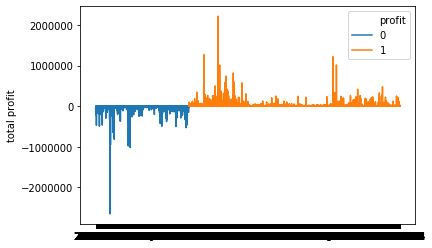

In [0]:
# s = time.time()
# %matplotlib inline
# ax = sns.lineplot(x="ProjectFamily", y="total profit",hue="profit", data=proj_prof)
# ax.set_xlabel('')
# end = time.time()
# print(end-s)
#Too long to run, dont run it

In [0]:
proj_prof.groupby('profit')['total profit'].median()
proj_prof.loc[proj_prof['total profit'] < 0,'total profit'].sum()
proj_prof.loc[proj_prof['total profit'] > 0,'total profit'].sum()

#The average gain for the profit projects are 12765.234397 while the avg lost is -18450.899822

89262541.14998499

In [0]:
proj_prof.head(10)

,ProjectFamily,EngCombinedExp,NonIndiaHrsPED,LaborEffortPED,TotalHoursPED,PrincipalProjectCountPED,PMProjectCountPED,LaborHrsPED,EngUniqueCount,EngProjectCountPED,EngHoursPED,EmpCountPED,EffortAmtPED,TypeCode,ProjectManager,ProjectEngineer,Principal,ParentClientTypeCode,ParentClientCode,OwningOrgCode,DivisionHead,ClientTypeCode,ClientState,ClientCode,ClientCity,TotalLaborBudgetEffort,HoursPTD,TotalBudgetHours,TotalBudgetEffort,LaborRevenueMTD,LaborCostMTD,OverheadMTD,LaborOverheadMTD,EffortMTD,CostMTD,BillingMTD,FamilyOverheadMTD,FamilyCostMTD,FamilyRevenueMTD,per_com_laborMTD,per_used_laborMTD,total profit,profit_per,profit,wip
0,1204001,0.000000,31.50,2548.52,31.50,0,11,31.50,0,11,0.00,16,2603.65,P06,121014,121014,121012,DE,UPTOWN,Z91,121012,DE,Texas,UPTOWN,Houston,2548.52,0.0,0.0,25485.20,2548.52,910.19,0.000000,0.000000,2603.65,960.31,2603.63,0.000000,960.31,2548.52,1.000000,0.100000,1588.210000,0.623189,1,-5.511000e+01
1,2300002,300.358875,770.75,45814.18,770.75,1196,382,770.75,91,653,582.25,381,48369.01,P06,230173,230173,230173,DE,LOUETT,T03,230009,DE,Texas,LOUETT,HOUSTON,5000.00,0.0,55.0,937500.00,40510.90,9766.85,19748.315675,19748.315675,29553.13,11611.41,56857.39,40641.283837,23287.80,74610.86,15.895853,0.043212,10681.776163,0.143167,1,1.775347e+04
2,2300028,21.189041,9.00,607.49,9.00,141,71,9.00,1,71,3.00,5,607.49,E02,230018,230018,230021,AR,KENN,C03,230009,AR,Missouri,KENN,ST. LOUIS,6000.00,0.0,86.0,42000.00,6000.00,216.96,433.703040,433.703040,607.49,216.96,6000.00,433.703040,216.96,6000.00,2.354308,0.142857,5349.336960,0.891556,1,0.000000e+00
3,2300033,53.361638,19.00,1173.18,19.00,599,87,19.00,15,385,13.00,39,1427.79,P06,230195,230141,230021,AR,ZCA,C03,230009,AR,Texas,ZCA,Houston,0.00,0.0,0.0,209000.00,12681.96,458.40,930.186018,930.186018,1386.12,557.70,235.45,5348.315848,2944.55,18870.44,4.976206,0.060679,10577.574152,0.560537,1,1.863499e+04
4,2300036,43.479450,11.50,907.59,11.50,269,41,11.50,6,112,11.50,14,933.65,C06,230125,230018,230021,AR,J*R,C03,230009,AR,Texas,J*R,HOUSTON,4800.00,2.5,70.0,48000.00,1200.00,302.53,573.544123,573.544123,933.65,328.59,1211.30,573.544123,328.59,1200.00,0.470862,0.025000,297.865877,0.248222,1,-1.130000e+01
5,2300043,349.347908,1133.50,76634.88,1133.50,1586,749,1133.50,103,1469,492.00,645,90017.47,P06,230172,230021,230021,AR,J*R,C03,230009,AR,Texas,J*R,HOUSTON,55383.46,0.0,716.0,1909854.18,64288.46,36865.96,73474.864626,73474.864626,116713.39,48044.30,74545.73,75324.564790,52861.04,68398.46,25.225802,0.033661,-59787.144790,-0.874101,0,-6.147270e+03
6,2300050,423.189013,443.50,28424.19,443.50,1021,1021,443.50,70,411,390.00,253,29481.33,P06,230021,230175,230021,DE,CDC,C03,230009,DE,Texas,CDC,Houston,42621.19,0.0,500.0,1065529.75,42621.19,12765.95,25471.413577,25471.413577,41175.21,13788.28,43322.38,28287.633383,15172.81,48031.96,16.723899,0.040000,4571.516617,0.095177,1,4.709580e+03
7,2300055,0.000000,1.50,73.50,1.50,0,65,1.50,0,65,0.00,5,75.94,H07,230160,230160,230146,GO,H*C,O04,230009,GO,Texas,HCID1,Houston,9500.00,0.0,130.0,85500.00,9500.00,3202.59,6401.977410,6401.977410,9072.62,3307.95,9500.00,57972.087427,170457.94,90386.51,3.727654,0.111111,-138043.517427,-1.527258,0,8.088651e+04
8,2300059,24.210956,77.50,4614.50,77.50,332,29,77.50,6,199,16.50,90,4649.16,P06,230195,230141,230021,AR,J*R,C03,230009,AR,Texas,J*R,HOUSTON,6031.90,0.0,85.0,78414.70,6031.90,3508.74,7025.826999,7025.826999,10592.89,3567.73,6031.90,7025.826999,3567.73,6031.90,2.366825,0.076923,-4561.656999,-0.756255,0,-9.094947e-13
9,2300064,0.000000,0.00,0.00,0.00,182,86,0.00,0,86,0.00,0,0.00,E02,230173,230173,230021,AR,HEERY,T03,230009,AR,Florida,HEERY,Tampa,2000.00,0.0,30.0,18000.00,2000.00,361.42,722.478580,722.478580,1030.13,377.92,2000.00,722.478580,377.92,2000.00,0.784769,0.111111,899.601420,0.449801,1,0.000000e+00


In [0]:
#Note that to run classification, we need to get rid of the variables we used to define the profitability, which are "FamilyOverheadMTD",	"FamilyCostMTD","FamilyRevenueMTD","total profit","profit_per". Also, ideally the "CostMTD", "OverheadMTD" should be equivalent to their corresponding family values. Even though they are not equivalent everywhere, there is still high correlation between them, so I will get tid of them, too.	

In [0]:
proj_prof = proj_prof.drop(columns=["FamilyOverheadMTD",	"FamilyCostMTD",	"FamilyRevenueMTD",	"total profit",	"profit_per","OverheadMTD","CostMTD"])

In [0]:
# proj_prof.shape

(10246, 38)

In [0]:
# %matplotlib inline
# sns.barplot(x = 7029,bins = 100)
# plt.title("Number of Sub-Projects in Project Family")
# proj_prof['profit']

1    7029
0    3097
Name: profit, dtype: int64

In [0]:
import matplotlib.pyplot as plt
corr = proj_prof.corr()
corr.style.background_gradient(cmap='coolwarm')

,EngCombinedExp,NonIndiaHrsPED,LaborEffortPED,TotalHoursPED,PrincipalProjectCountPED,PMProjectCountPED,LaborHrsPED,EngUniqueCount,EngProjectCountPED,EngHoursPED,EmpCountPED,EffortAmtPED,ProjectManager,Principal,DivisionHead,TotalLaborBudgetEffort,HoursPTD,TotalBudgetHours,TotalBudgetEffort,LaborRevenueMTD,LaborCostMTD,LaborOverheadMTD,EffortMTD,BillingMTD,per_com_laborMTD,per_used_laborMTD,profit,wip
EngCombinedExp,1,0.826555,0.847865,0.828427,0.677186,0.698402,0.828427,0.926038,0.724613,0.813597,0.883552,0.82592,-0.0584775,-0.0594811,-0.0219323,0.742996,0.177258,0.460902,0.733105,0.785365,0.773581,0.782558,0.742664,0.74621,-0.011467,-0.0513767,-0.0565287,0.392939
NonIndiaHrsPED,0.826555,1,0.988594,0.999596,0.501159,0.515983,0.999596,0.911915,0.541078,0.993836,0.951086,0.959335,-0.0212908,-0.0287081,-0.0203043,0.8978,0.178272,0.454474,0.8949,0.927039,0.952178,0.93864,0.908121,0.886681,-0.00686782,-0.0351007,-0.0571626,0.357949
LaborEffortPED,0.847865,0.988594,1,0.989247,0.502962,0.51728,0.989247,0.923806,0.551312,0.979433,0.961091,0.974285,-0.0150877,-0.0253254,-0.0213086,0.895837,0.194951,0.448246,0.899106,0.926437,0.9425,0.935666,0.911276,0.88904,-0.00890559,-0.0351556,-0.0611671,0.380684
TotalHoursPED,0.828427,0.999596,0.989247,1,0.500526,0.516641,1,0.913281,0.541643,0.993685,0.951724,0.959938,-0.0215859,-0.0291003,-0.0212809,0.898122,0.179448,0.456341,0.893693,0.927387,0.952465,0.938805,0.908329,0.886715,-0.00676453,-0.0353404,-0.0572368,0.358438
PrincipalProjectCountPED,0.677186,0.501159,0.502962,0.500526,1,0.868171,0.500526,0.684932,0.863029,0.47831,0.618486,0.485377,-0.146009,-0.150987,-0.0655053,0.407807,0.117747,0.294415,0.41401,0.443759,0.419992,0.428733,0.398524,0.412465,0.00604852,-0.0680778,-0.0511986,0.338521
PMProjectCountPED,0.698402,0.515983,0.51728,0.516641,0.868171,1,0.516641,0.730054,0.917977,0.497876,0.641736,0.498379,-0.14005,-0.141051,-0.0650985,0.41916,0.119409,0.30431,0.426034,0.457957,0.439451,0.447726,0.414933,0.423272,-0.00259028,-0.0791334,-0.0592111,0.316419
LaborHrsPED,0.828427,0.999596,0.989247,1,0.500526,0.516641,1,0.913281,0.541643,0.993685,0.951724,0.959938,-0.0215859,-0.0291003,-0.0212809,0.898122,0.179448,0.456341,0.893693,0.927387,0.952465,0.938805,0.908329,0.886715,-0.00676453,-0.0353404,-0.0572368,0.358438
EngUniqueCount,0.926038,0.911915,0.923806,0.913281,0.684932,0.730054,0.913281,1,0.754668,0.900056,0.966464,0.894458,-0.0462393,-0.0635425,-0.035133,0.803678,0.189176,0.465045,0.80713,0.84544,0.841666,0.844061,0.805889,0.800842,-0.00809997,-0.057324,-0.0759448,0.439991
EngProjectCountPED,0.724613,0.541078,0.551312,0.541643,0.863029,0.917977,0.541643,0.754668,1,0.519782,0.66797,0.532152,-0.132406,-0.136258,-0.06307,0.437703,0.103713,0.304137,0.450525,0.482343,0.45995,0.469072,0.43895,0.448686,-0.00258414,-0.0737442,-0.0509291,0.365763
EngHoursPED,0.813597,0.993836,0.979433,0.993685,0.47831,0.497876,0.993685,0.900056,0.519782,1,0.930998,0.951259,-0.0147915,-0.0217806,-0.0185585,0.892309,0.171622,0.4478,0.883076,0.924146,0.945312,0.92847,0.903457,0.885823,-0.00605463,-0.0342947,-0.0512045,0.340455


In [0]:
#Try: delete the highly correlated variables
col = corr.columns
ls = []
for i in range(len(corr)):
  for j in range(i+1,len(corr)):
    if corr.iloc[i,j] >= 0.8:
      ls.append((col[i],col[j]))
ls

In [0]:
#Convert all varchar to lowercase
for i in proj_prof.columns:
  if(proj_prof.loc[:,i]).dtypes == 'O':
    try:
      proj_prof.loc[:,i] = proj_prof.loc[:,i].apply(lambda x:x.lower())
    except:
      print(i)

ProjectEngineer
ClientCode


In [0]:
#For clientcode, there is one vlaue that is a number, due to some weired reasons. I will skip this value
for i in range(len(proj_prof['ClientCode'])):
  try:
    proj_prof['ClientCode'][i] = proj_prof['ClientCode'][i].lower()
  except:
    print(i,'\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5039 



In [0]:
#This variable has nothing to do with the tree splitting, remove it.
#proj_prof = proj_prof.drop('ProjectFamily',axis = 1)
#proj_prof.to_csv("project_profit.csv",index=False)

In [0]:
proj_prof = pd.read_csv("project_profit.csv")

In [0]:
proj_prof.head(10)

,EngCombinedExp,NonIndiaHrsPED,LaborEffortPED,TotalHoursPED,PrincipalProjectCountPED,PMProjectCountPED,LaborHrsPED,EngUniqueCount,EngProjectCountPED,EngHoursPED,EmpCountPED,EffortAmtPED,TypeCode,ProjectManager,ProjectEngineer,Principal,ParentClientTypeCode,ParentClientCode,OwningOrgCode,DivisionHead,ClientTypeCode,ClientState,ClientCode,ClientCity,TotalLaborBudgetEffort,HoursPTD,TotalBudgetHours,TotalBudgetEffort,LaborRevenueMTD,LaborCostMTD,LaborOverheadMTD,EffortMTD,BillingMTD,per_com_laborMTD,per_used_laborMTD,profit,wip
0,0.000000,31.50,2548.52,31.50,0,11,31.50,0,11,0.00,16,2603.65,p06,121014,121014.0,121012,de,uptown,z91,121012,de,texas,uptown,houston,2548.52,0.0,0.0,25485.20,2548.52,910.19,0.000000,2603.65,2603.63,1.000000,0.100000,1,-5.511000e+01
1,300.358875,770.75,45814.18,770.75,1196,382,770.75,91,653,582.25,381,48369.01,p06,230173,230173.0,230173,de,louett,t03,230009,de,texas,louett,houston,5000.00,0.0,55.0,937500.00,40510.90,9766.85,19748.315675,29553.13,56857.39,15.895853,0.043212,1,1.775347e+04
2,21.189041,9.00,607.49,9.00,141,71,9.00,1,71,3.00,5,607.49,e02,230018,230018.0,230021,ar,kenn,c03,230009,ar,missouri,kenn,st. louis,6000.00,0.0,86.0,42000.00,6000.00,216.96,433.703040,607.49,6000.00,2.354308,0.142857,1,0.000000e+00
3,53.361638,19.00,1173.18,19.00,599,87,19.00,15,385,13.00,39,1427.79,p06,230195,230141.0,230021,ar,zca,c03,230009,ar,texas,zca,houston,0.00,0.0,0.0,209000.00,12681.96,458.40,930.186018,1386.12,235.45,4.976206,0.060679,1,1.863499e+04
4,43.479450,11.50,907.59,11.50,269,41,11.50,6,112,11.50,14,933.65,c06,230125,230018.0,230021,ar,j*r,c03,230009,ar,texas,j*r,houston,4800.00,2.5,70.0,48000.00,1200.00,302.53,573.544123,933.65,1211.30,0.470862,0.025000,1,-1.130000e+01
5,349.347908,1133.50,76634.88,1133.50,1586,749,1133.50,103,1469,492.00,645,90017.47,p06,230172,230021.0,230021,ar,j*r,c03,230009,ar,texas,j*r,houston,55383.46,0.0,716.0,1909854.18,64288.46,36865.96,73474.864626,116713.39,74545.73,25.225802,0.033661,0,-6.147270e+03
6,423.189013,443.50,28424.19,443.50,1021,1021,443.50,70,411,390.00,253,29481.33,p06,230021,230175.0,230021,de,cdc,c03,230009,de,texas,cdc,houston,42621.19,0.0,500.0,1065529.75,42621.19,12765.95,25471.413577,41175.21,43322.38,16.723899,0.040000,1,4.709580e+03
7,0.000000,1.50,73.50,1.50,0,65,1.50,0,65,0.00,5,75.94,h07,230160,230160.0,230146,go,h*c,o04,230009,go,texas,hcid1,houston,9500.00,0.0,130.0,85500.00,9500.00,3202.59,6401.977410,9072.62,9500.00,3.727654,0.111111,0,8.088651e+04
8,24.210956,77.50,4614.50,77.50,332,29,77.50,6,199,16.50,90,4649.16,p06,230195,230141.0,230021,ar,j*r,c03,230009,ar,texas,j*r,houston,6031.90,0.0,85.0,78414.70,6031.90,3508.74,7025.826999,10592.89,6031.90,2.366825,0.076923,0,-9.094947e-13
9,0.000000,0.00,0.00,0.00,182,86,0.00,0,86,0.00,0,0.00,e02,230173,230173.0,230021,ar,heery,t03,230009,ar,florida,heery,tampa,2000.00,0.0,30.0,18000.00,2000.00,361.42,722.478580,1030.13,2000.00,0.784769,0.111111,1,0.000000e+00


## Random Forest

In [0]:
proj_profnew = proj_prof.dropna()

In [0]:
labels = np.array(proj_profnew['profit'])

In [0]:
proj_profnew = proj_profnew.drop('profit',axis=1)

In [0]:
profit_list = list(proj_profnew.columns)

In [0]:
proj_profnew['ProjectEngineer'] =proj_profnew['ProjectEngineer'].astype(str)

In [0]:
categorical_feature_mask = (proj_profnew.dtypes==object)
categorical_cols = proj_profnew.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
proj_profnew[categorical_cols] = proj_profnew[categorical_cols].apply(lambda col: le.fit_transform(col))
proj_profnew[categorical_cols].head(10)

,TypeCode,ProjectEngineer,ParentClientTypeCode,ParentClientCode,OwningOrgCode,ClientTypeCode,ClientState,ClientCode,ClientCity
0,94,7,27,2606,46,28,60,2832,250
1,94,31,27,1511,42,28,60,1660,250
2,47,13,15,1382,1,16,33,1531,525
3,94,21,15,2783,1,16,60,3037,250
4,31,13,15,1281,1,16,60,1417,250
5,94,14,15,1281,1,16,60,1417,250
6,94,32,27,402,1,28,60,441,250
7,70,28,32,1029,21,33,60,1162,250
8,94,21,15,1281,1,16,60,1417,250
9,47,31,15,1075,42,16,14,1182,540


In [0]:
X_train, X_test, y_train, y_test = train_test_split(proj_profnew, labels, test_size = 0.25)

In [0]:
proj_profnew = np.array(proj_profnew)

In [0]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9160613397901534


In [0]:
#Feature Importance
feature_imp = pd.Series(clf.feature_importances_,index=profit_list).sort_values(ascending=False)
feature_imp

LaborRevenueMTD             0.107399
LaborOverheadMTD            0.091865
BillingMTD                  0.075774
EffortMTD                   0.070010
wip                         0.063892
TotalLaborBudgetEffort      0.059205
EffortAmtPED                0.052125
LaborCostMTD                0.049807
TotalBudgetEffort           0.033010
LaborEffortPED              0.029253
per_com_laborMTD            0.027368
NonIndiaHrsPED              0.025640
TotalBudgetHours            0.023343
LaborHrsPED                 0.020820
EmpCountPED                 0.019335
TotalHoursPED               0.018527
per_used_laborMTD           0.015933
EngHoursPED                 0.015690
PrincipalProjectCountPED    0.014981
EngCombinedExp              0.014684
PMProjectCountPED           0.013797
ProjectEngineer             0.013601
ProjectManager              0.013467
EngUniqueCount              0.013380
EngProjectCountPED          0.013230
ClientCode                  0.012319
ParentClientCode            0.012107
H

No handles with labels found to put in legend.


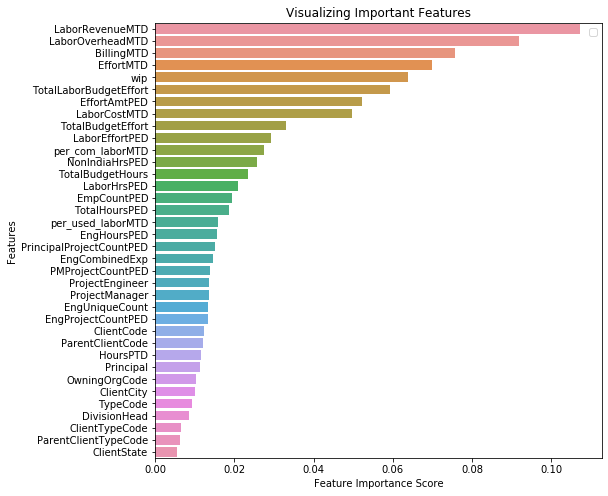

In [0]:
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
#From the plot, the top 5 contributing variables are BillingMTD, EffortMTD, LaborOverheadMTD, TotalBudgetHours, and LarborCostMTD. Together they added up to 0.4339341270424045, nearly half of the total variance.

## Random Forest 2


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import scipy
import csv
import time
import sys
le = LabelEncoder() 
np.set_printoptions(threshold=100)

df = pd.read_csv("project_profit.csv", encoding = "ISO-8859-1")
rf = RandomForestClassifier(n_estimators=1000)
# df = df.drop(columns=['ProjectFamily'])

catagory_idx = []
i = 0
for (col_name, col) in df.iteritems():
  if col.dtype == 'object':
    df[col_name] = le.fit_transform(df[col_name])
    catagory_idx.append(i)
  i += 1


#print(catagory_idx)
#print(df.columns[catagory_idx])
onehotencoder = OneHotEncoder(categorical_features = catagory_idx)

#print(df)
#df['profit_per'][(df['profit_per']==float('-inf'))] = -sys.maxsize - 1
#df['profit_per'][(df['profit_per']==float('inf'))] = sys.maxsize
df = df.dropna(axis=0)
response = df['profit']
# df = df.drop(columns=['profit', 'profit_per', 'total profit', 'FamilyRevenueMTD', 'FamilyOverheadMTD', 'FamilyCostMTD', 'CostMTD', 'OverheadMTD'])
features = list(df.columns)

# print(df.shape)
# print(response.shape)
print(response.shape)
idx = np.random.permutation(response.shape[0])
print(idx.shape)

# print((df == np.nan).sum())
rand_pred = np.array(df)
#rand_pred = onehotencoder.fit_transform(df)
#rand_pred = rand_pred.toarray()
#print(scipy.sparse.issparse(rand_pred))
rand_resp = np.array(response)[idx]

rand_pred = rand_pred[idx]
#print(rand_pred)
# print(rand_pred[10])
valid_pct = 0.2
# print(rand_pred.shape, rand_resp.shape)
valid_len = (int)(valid_pct*response.shape[0])
X_valid, Y_valid = rand_pred[idx[:valid_len]], rand_resp[idx[:valid_len]]
X_train, Y_train = rand_pred[idx[valid_len:]], rand_resp[idx[valid_len:]]
#print(set(idx[:valid_len]).intersection(set(idx[valid_len:])))

# print(Y_valid.sum(), Y_valid.count())
# print(Y_train.sum(), Y_train.count())
#rf.fit(X_train, Y_train)
#print((np.inf == Y_train).sum())
#print(X_train.shape, Y_train.shape)
'''
for y in Y_train:
  if y != 0 and y != 1:
    print(y)
'''
'''
print(X_train.shape, Y_train.shape)
print(Y_train.sum()/Y_train.shape[0])
print(X_valid.shape, Y_valid.shape)
print(Y_valid.sum()/Y_valid.shape[0])
'''
scores = cross_val_score(rf, rand_pred, rand_resp, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

'''
res = rf.fit(X_train, Y_train)

print(sum(res.predict(X_valid) == Y_valid)/len(Y_valid))

print(sum(res.predict(X_train) == Y_train)/len(Y_train))


importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
print(features)
plt.yticks(range(len(indices)), features)
plt.xlabel("Relative Importance")
plt.show()
'''


(9911,)
(9911,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


'\nres = rf.fit(X_train, Y_train)\n\nprint(sum(res.predict(X_valid) == Y_valid)/len(Y_valid))\n\nprint(sum(res.predict(X_train) == Y_train)/len(Y_train))\n\n\nimportances = rf.feature_importances_\nindices = np.argsort(importances)\n\nplt.figure(figsize=(20,10))\nplt.title(\'Feature Importances\')\nplt.barh(range(len(indices)), importances[indices], color = \'r\', align = \'center\')\nprint(features)\nplt.yticks(range(len(indices)), features)\nplt.xlabel("Relative Importance")\nplt.show()\n'

## XGBoost

In [0]:
df = pd.read_csv("project_profit.csv", encoding = "ISO-8859-1")

In [0]:
df['ProjectFamily'].unique()

array(['1204001', '2300002', '2300028', ..., '4306026', '4303107',
       '3804082'], dtype=object)

In [0]:
num_pos = (df['profit']==1).sum()
num_neg = (df['profit']==0).sum()
print(num_pos)
print(num_neg)

6902
3344


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import scipy
import csv
import time
import sys
from collections import Counter 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [0]:
le = LabelEncoder() 
#np.set_printoptions(threshold=100)

# df = pd.read_csv("../MIDAS/project_profit.csv", encoding = "ISO-8859-1")
df = pd.read_csv("project_profit.csv", encoding = "ISO-8859-1")
#This time we dont need to drop nan cuz xgboost will handle it!
num_pos = (df['profit']==1).sum()
num_neg = (df['profit']==0).sum()
gb = XGBClassifier(n_estimators = 700, scale_pos_weight = num_neg/num_pos, max_depth = 5,eval_metric = ['auc'])#GradientBoostingClassifier(n_estimators=700, max_depth=5)
#df = df.replace([np.inf, -np.inf], sys.maxsize)

catagory_idx = []
i = 0
for (col_name, col) in df.iteritems():
  if col.dtype == 'object':
    df[col_name] = le.fit_transform(df[col_name])
    catagory_idx.append(i)
  i += 1

onehotencoder = OneHotEncoder(categorical_features = catagory_idx)
df = df.dropna(axis=0)
response = df['profit']
df = df.drop(columns=['profit'])#, 'profit_per', 'total profit', 'FamilyRevenueMTD', 'FamilyOverheadMTD', 'FamilyCostMTD', 'CostMTD', 'OverheadMTD'])
features = list(df.columns)

idx = np.random.permutation(response.shape[0])
#print((df == np.nan).sum())
rand_pred = df#np.array(df)
rand_resp = np.array(response)[idx]
rand_pred = rand_pred.iloc[idx]


scores = cross_val_score(gb, rand_pred, rand_resp, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[0.9375     0.94153226 0.93850806 0.95362903 0.93138244 0.93037336
 0.93642785 0.93838384 0.93030303 0.95555556]
Accuracy: 0.94 (+/- 0.02)


In [0]:
valid_pct = 0.2
# print(rand_pred.shape, rand_resp.shape)
valid_len = (int)(valid_pct*response.shape[0])
X_valid, Y_valid = rand_pred.iloc[idx[:valid_len]], rand_resp[idx[:valid_len]]
X_train, Y_train = rand_pred.iloc[idx[valid_len:]], rand_resp[idx[valid_len:]]

res = gb.fit(X_train, Y_train,eval_metric = ['auc'])

In [0]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError


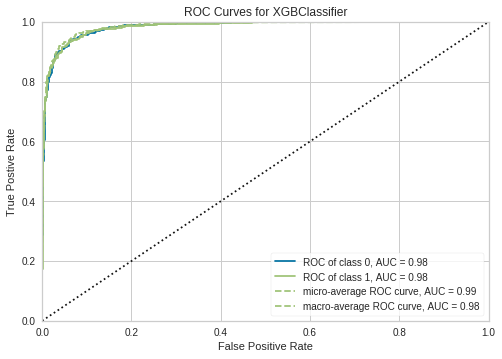

In [0]:
rocauc = ROCAUC(res, classes=[0,1])

rocauc.score(X_valid, Y_valid)  
r = rocauc.poof()

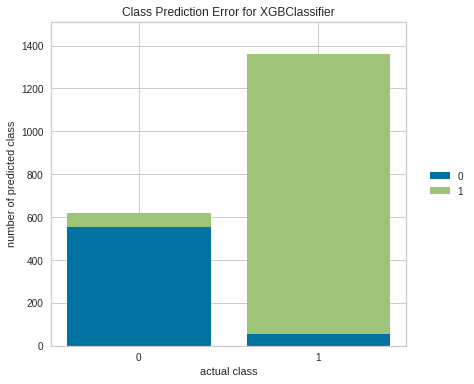

In [0]:
error = ClassPredictionError(res, classes=[0,1])

error.score(X_valid, Y_valid)
e = error.poof()

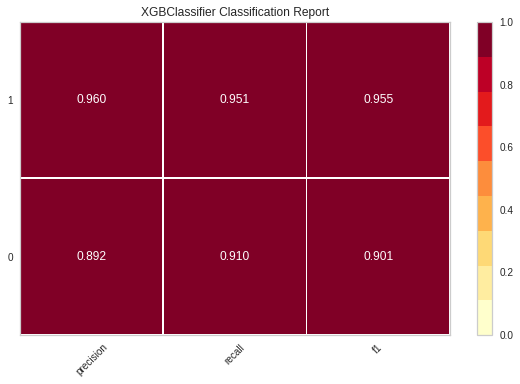

In [0]:
report = ClassificationReport(res, classes=[0,1])

report.score(X_valid, Y_valid)
c = report.poof()

0.9424823410696267
1.0
['EngCombinedExp', 'NonIndiaHrsPED', 'LaborEffortPED', 'TotalHoursPED', 'PrincipalProjectCountPED', 'PMProjectCountPED', 'LaborHrsPED', 'EngUniqueCount', 'EngProjectCountPED', 'EngHoursPED', 'EmpCountPED', 'EffortAmtPED', 'TypeCode', 'ProjectManager', 'ProjectEngineer', 'Principal', 'ParentClientTypeCode', 'ParentClientCode', 'OwningOrgCode', 'DivisionHead', 'ClientTypeCode', 'ClientState', 'ClientCode', 'ClientCity', 'TotalLaborBudgetEffort', 'HoursPTD', 'TotalBudgetHours', 'TotalBudgetEffort', 'LaborRevenueMTD', 'LaborCostMTD', 'LaborOverheadMTD', 'EffortMTD', 'BillingMTD', 'per_com_laborMTD', 'per_used_laborMTD', 'wip']


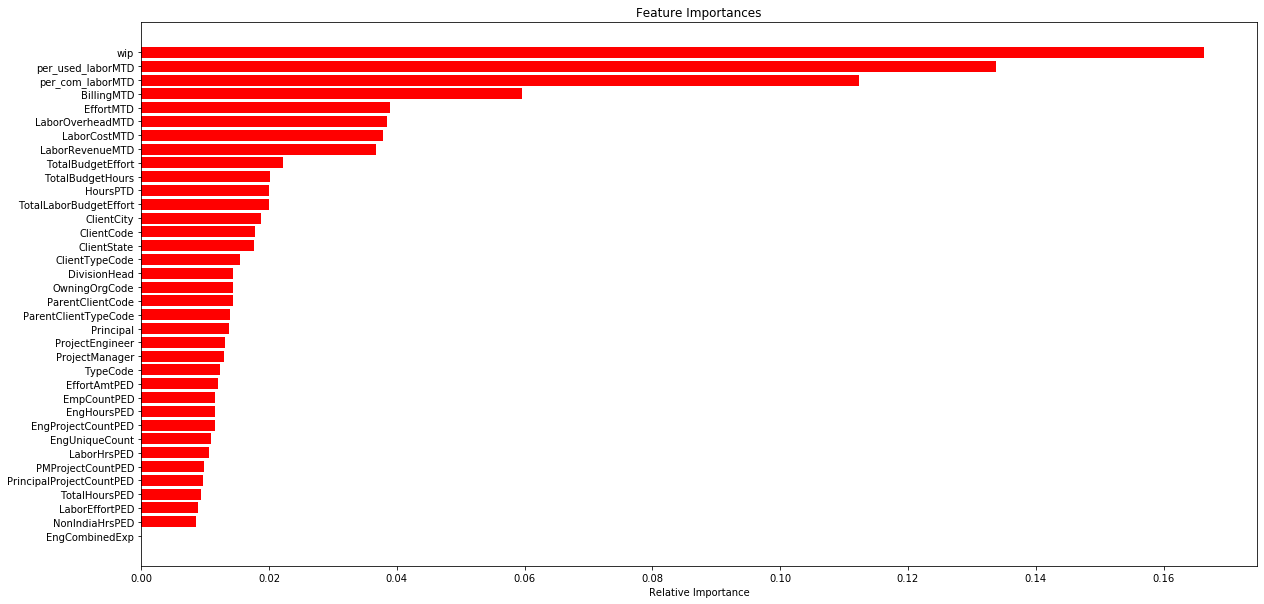

In [0]:

valid_pct = 0.2
# print(rand_pred.shape, rand_resp.shape)
valid_len = (int)(valid_pct*response.shape[0])
X_valid, Y_valid = rand_pred.iloc[idx[:valid_len]], rand_resp[idx[:valid_len]]
X_train, Y_train = rand_pred.iloc[idx[valid_len:]], rand_resp[idx[valid_len:]]

res = gb.fit(X_train, Y_train,eval_metric = ['auc'])

y_pred = res.predict(X_valid)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)



print(sum(res.predict(X_valid) == Y_valid)/len(Y_valid))
print(sum(res.predict(X_train) == Y_train)/len(Y_train))


importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'r', align = 'center')
print(features)
plt.yticks(range(len(indices)), features)
plt.xlabel("Relative Importance")
plt.show()



In [0]:
#!pip install shap

     |████████████████████████████████| 266kB 3.3MB/s 
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=376827 sha256=2047f39e059895e62f02f97ff7e5484c6e263e1af90efde3cdb1ecff54940436
  Stored in directory: /root/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built shap


In [0]:
import shap

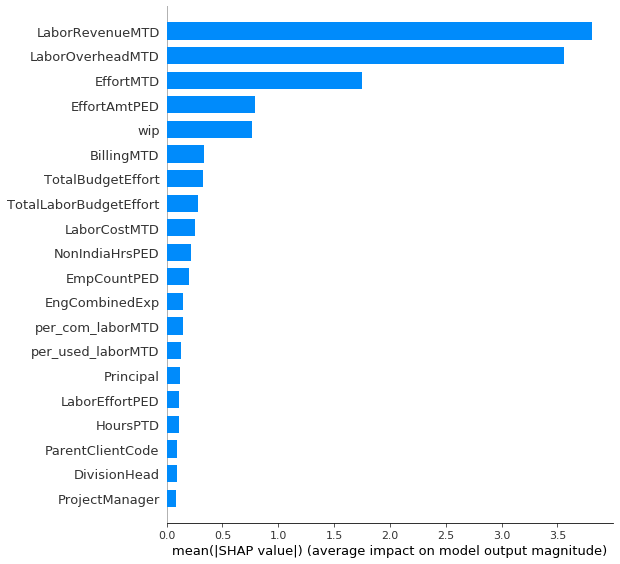

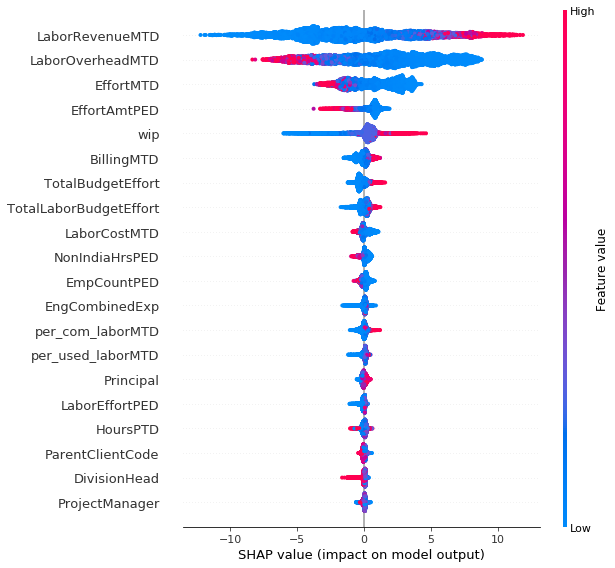

In [0]:
shap_values = shap.TreeExplainer(gb).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')
shap.summary_plot(shap_values, X_train)

In [0]:
# explainer = shap.TreeExplainer(gb)
# shap_values = explainer.shap_values(df)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], df.iloc[0,:])

In [0]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, df, link='logit')

In [0]:
shap.decision_plot(explainer.expected_value, shap_values, df.iloc[range(20),:])


In [0]:
df.iloc[range(20),:]

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


#Time Series

In [0]:
df = pd.read_csv("new_df.csv")
df.ProjectCode = df.ProjectCode.astype(str)
df.ProjectFamily = df.ProjectFamily.astype(str)

#Note that original project code is a mixture of int and string, convert them to str.
df['ProjectEngineer'] = df['ProjectEngineer'].fillna(-1)
df = df.loc[df['ClientCode'].apply(lambda x:isinstance(x,str)),:]
#Feature selection, remove monotone variables. Monotone Variables mean that the variables most values of this variable is the same. This will have little effect for the division tree.
del_cols = []
for label,content in df.iteritems():
  if content.value_counts(normalize = True).max() > 0.7:
    del_cols.append(label)
del_cols.append("ClientPostalCode")
df = df.drop(del_cols,axis = 1)
#% complete labor
df['per_com_laborMTD'] = df["LaborRevenueMTD"]/df['TotalLaborBudgetEffort']
df['per_com_laborPTD'] = df["LaborRevenuePTD"]/df['TotalLaborBudgetEffort']
#% used labor
df["per_used_laborMTD"] = df["LaborRevenueMTD"]/df["TotalBudgetEffort"]
df['per_used_laborPTD'] = df["LaborRevenuePTD"]/df['TotalBudgetEffort']
#overhead rate
df['overhead_rate'] = df['LaborOverheadMTD']/df['LaborCostMTD']
df = df.replace([np.inf, -np.inf], sys.maxsize)
df = df.fillna(sys.maxsize)
df['year'] = df['PeriodEndDate'].apply(lambda x:pd.to_datetime(x).year)
df['month'] = df['PeriodEndDate'].apply(lambda x:pd.to_datetime(x).month)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head(50)

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print(df.groupby('ProjectFamily')['PeriodEndDate'].min().head(100))
print(df.groupby('ProjectFamily')['PeriodEndDate'].max().head(100))

In [0]:
min_year = df.groupby('ProjectFamily')['PeriodEndDate'].min()
max_year = df.groupby('ProjectFamily')['PeriodEndDate'].max()

(array([ 365.,  892., 1076.,  781.,  490., 1207., 1133., 1330., 1647.,
        1325.]),
 array([2001. , 2002.8, 2004.6, 2006.4, 2008.2, 2010. , 2011.8, 2013.6,
        2015.4, 2017.2, 2019. ]),
 <a list of 10 Patch objects>)

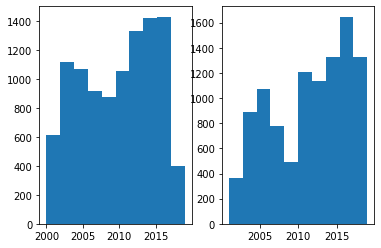

In [0]:
fig,axes = plt.subplots(1,2)
axes[0].hist(list(map(lambda x:int(x[0:4]),min_year.values)))
axes[1].hist(list(map(lambda x:int(x[0:4]),max_year.values)))

In [0]:
print(min_year.min())
print(max_year.max())

2000-12-31 00:00:00
2019-03-31 00:00:00


In [0]:
start = 2000
end = 2002
imp_vars = []
# start_month = 1
# end_month = 6
for index in range(11):
#np.set_printoptions(threshold=100)
  
  le = LabelEncoder()
  #Only get the project data within the range
  df_sub = df.loc[((df['year'] >= start) & (df['year'] <= end)),:]
  if df_sub.empty:
    continue
  pp_sub = proj_df(df_sub)
  pp_sub = pp_sub.replace([np.inf, -np.inf], sys.maxsize)
  pp_sub = pp_sub.fillna(sys.maxsize)
  num_pos = (pp_sub['profit']==1).sum()
  num_neg = (pp_sub['profit']==0).sum()
  gb = XGBClassifier(n_estimators = 700, scale_pos_weight = num_neg/num_pos, max_depth = 5)#GradientBoostingClassifier(n_estimators=700, max_depth=5)
# df = pd.read_csv("../MIDAS/project_profit.csv", encoding = "ISO-8859-1")
# df = pd.read_csv("project_profit.csv", encoding = "ISO-8859-1")
#This time we dont need to drop nan cuz xgboost will handle it!

#df = df.replace([np.inf, -np.inf], sys.maxsize)
  catagory_idx = []
  i = 0
  for (col_name, col) in pp_sub.iteritems():
    if col.dtype == 'object':
      pp_sub[col_name] = le.fit_transform(pp_sub[col_name])
      catagory_idx.append(i)
    i += 1

  onehotencoder = OneHotEncoder(categorical_features = catagory_idx)
  pp_sub = pp_sub.dropna(axis=0)


  response = pp_sub['profit']
  pp_sub = pp_sub.drop(columns=['profit','ProjectFamily'])#, 'profit_per', 'total profit', 'FamilyRevenueMTD', 'FamilyOverheadMTD', 'FamilyCostMTD', 'CostMTD', 'OverheadMTD'])
  features = list(pp_sub.columns)
  if pp_sub.empty:
    continue
  idx = np.random.permutation(response.shape[0])
#print((df == np.nan).sum())
  rand_pred = pp_sub#np.array(df)
  rand_resp = np.array(response)[idx]
  rand_pred = rand_pred.iloc[idx]

  try:
    scores = cross_val_score(gb, rand_pred, rand_resp, cv = 10)
  except:
    pass
  valid_pct = 0.2
# print(rand_pred.shape, rand_resp.shape)
  valid_len = (int)(valid_pct*response.shape[0])
  X_valid, Y_valid = rand_pred.iloc[idx[:valid_len]], rand_resp[idx[:valid_len]]
  X_train, Y_train = rand_pred.iloc[idx[valid_len:]], rand_resp[idx[valid_len:]]
  gb.fit(X_train, Y_train)
  shap_values = shap.TreeExplainer(gb).shap_values(X_train)
  top_3_list = sorted(shap_values[0], reverse=True)[:3]
  top_3_var = []
  for val in top_3_list:
    top_3_var.append(pp_sub.columns[shap_values[0] == val][0])
  # shap.summary_plot(shap_values, X_train, plot_type='bar')
  # shap.summary_plot(shap_values, X_train)
  imp_vars.append(imp_var)
  print(top_3_var)
  print(df_sub.shape)
  print((start,start_month),(end,end_month))
  print(scores)
  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  start += 2
  end += 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['LaborRevenueMTD', 'EngCombinedExp', 'PMProjectCountPED']
(22617, 74)
(2000, 6) (2002, 12)
[0.84347826 0.83478261 0.82608696 0.79130435 0.86956522 0.8173913
 0.86086957 0.87826087 0.89565217 0.82608696]
Accuracy: 0.84 (+/- 0.06)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['wip', 'LaborRevenueMTD', 'EngProjectCountPED']
(54839, 74)
(2002, 6) (2004, 12)
[0.91555556 0.91555556 0.85650224 0.90134529 0.88340807 0.86547085
 0.88340807 0.9058296  0.88789238 0.89686099]
Accuracy: 0.89 (+/- 0.04)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['wip', 'EffortAmtPED', 'PrincipalProjectCountPED']
(61800, 74)
(2004, 6) (2006, 12)
[0.85375494 0.88537549 0.90513834 0.93675889 0.90118577 0.8972332
 0.91699605 0.91304348 0.88932806 0.89243028]
Accuracy: 0.90 (+/- 0.04)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['LaborOverheadMTD', 'EffortMTD', 'EffortAmtPED']
(64192, 74)
(2006, 6) (2008, 12)
[0.86752137 0.91025641 0.90598291 0.9017094  0.93589744 0.87982833
 0.91845494 0.87931034 0.86637931 0.89224138]
Accuracy: 0.90 (+/- 0.04)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['LaborOverheadMTD', 'LaborRevenueMTD', 'EffortAmtPED']
(58799, 74)
(2008, 6) (2010, 12)
[0.8940678  0.90254237 0.91101695 0.90254237 0.89787234 0.92307692
 0.91452991 0.8974359  0.88888889 0.91025641]
Accuracy: 0.90 (+/- 0.02)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['BillingMTD', 'ProjectManager', 'ProjectEngineer']
(59747, 74)
(2010, 6) (2012, 12)
[0.91821561 0.90671642 0.87313433 0.91791045 0.9141791  0.88432836
 0.91044776 0.93283582 0.92509363 0.86891386]
Accuracy: 0.91 (+/- 0.04)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['LaborOverheadMTD', 'EffortMTD', 'EffortAmtPED']
(67671, 74)
(2012, 6) (2014, 12)
[0.88541667 0.90625    0.90625    0.89236111 0.8989547  0.87762238
 0.90909091 0.8951049  0.9020979  0.8951049 ]
Accuracy: 0.90 (+/- 0.02)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['EffortMTD', 'LaborOverheadMTD', 'EffortAmtPED']
(73472, 74)
(2014, 6) (2016, 12)
[0.921875   0.89028213 0.9184953  0.92163009 0.9153605  0.90880503
 0.89937107 0.92767296 0.91509434 0.93710692]
Accuracy: 0.92 (+/- 0.03)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['LaborRevenueMTD', 'LaborOverheadMTD', 'wip']
(55008, 74)
(2016, 6) (2018, 12)
[0.94295302 0.92281879 0.91919192 0.91919192 0.96621622 0.92567568
 0.91216216 0.94932432 0.92567568 0.90540541]
Accuracy: 0.93 (+/- 0.04)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['EffortMTD', 'wip', 'LaborOverheadMTD']
(11676, 74)
(2018, 6) (2020, 12)
[0.96240602 0.88721805 0.91729323 0.93233083 0.90225564 0.93984962
 0.91729323 0.93181818 0.91603053 0.8778626 ]
Accuracy: 0.92 (+/- 0.05)


In [0]:
model = gb.fit(X_train, Y_train)
model.get_booster().get_score(importance_type='gain')

{'BillingMTD': 0.37974957301218404,
 'ClientCity': 0.4191615948015151,
 'ClientCode': 0.15331842639680845,
 'ClientState': 0.4973919387081632,
 'ClientTypeCode': 0.08740660480097559,
 'DivisionHead': 0.14920347970698403,
 'EffortAmtPED': 1.1917050761381194,
 'EffortMTD': 1.7915155659106987,
 'EmpCountPED': 0.3917057787588732,
 'EngCombinedExp': 0.418445721182125,
 'EngHoursPED': 0.3773271253700001,
 'EngProjectCountPED': 0.1618932786373196,
 'EngUniqueCount': 0.22737794489109903,
 'HoursPTD': 0.2593865940019741,
 'LaborCostMTD': 1.5630806690758245,
 'LaborEffortPED': 0.3196618781007692,
 'LaborOverheadMTD': 1.3500775494703532,
 'LaborRevenueMTD': 4.820613774720185,
 'NonIndiaHrsPED': 1.1189656709295457,
 'OwningOrgCode': 0.3229954258672416,
 'PMProjectCountPED': 0.19860684587521735,
 'ParentClientCode': 0.2225156813726138,
 'ParentClientTypeCode': 0.2546372802115384,
 'Principal': 0.2782037854826506,
 'PrincipalProjectCountPED': 0.20792029453855557,
 'ProjectEngineer': 0.40998885990515

In [0]:
from wordcloud import WordCloud 


In [0]:
imp_vars

[['EngCombinedExp', 'EngCombinedExp'],
 ['EngCombinedExp', 'EngCombinedExp'],
 ['EngCombinedExp', 'EngCombinedExp'],
 ['EngCombinedExp', 'EngCombinedExp'],
 ['EngCombinedExp', 'EngCombinedExp'],
 ['EngCombinedExp', 'EngCombinedExp'],
 ['EngCombinedExp', 'EngCombinedExp'],
 ['EngCombinedExp', 'EngCombinedExp'],
 ['EngCombinedExp', 'EngCombinedExp'],
 ['EngCombinedExp', 'EngCombinedExp']]

In [0]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
PREV

In [0]:
a = pd.read_csv("project_profit.csv", encoding = "ISO-8859-1")


In [0]:
sum(a['profit'] == 1)

6902

## Other

In [0]:
temp = df.loc[df['ProjectFamily'] == "2300002",:]

In [0]:
temp.sort_values(by = ["PeriodEndDate"]).loc[:,['PeriodEndDate','ProjectCode','CostMTD','CostPTD','FamilyCostMTD','FamilyCostPTD']].head(100)
#Observe that the cost of family does not always increase with time. This might be some error when entering the data. Meanwhile, for different sub-projects, the familycost does not cumulate the cost, but to start again every new
#subproject. So, for each subproject, I will the sum of the MTD data to represent the PTD.

In [0]:
#create a new dataframe to store the profitablility of a project family
# proj_prof = pd.DataFrame(pd.DataFrame(df.groupby(['ProjectFamily','AccountingPeriod'])['profit_amtMTD'].first()).groupby('ProjectFamily')['profit_amtMTD'].sum())